# 과제1) 교통사고 데이터 EDA

### 1) 교통사고 관련 데이터
- 데이터 링크 : https://www.kaggle.com/datasets/jacksondivakarr/car-crash-dataset/data

- 캐글에서 데이터셋을 찾다가 교통사고 관련 데이터를 선택하게 되었다, 요즘 교통사고 블랙박스 영상을 통해 많은 요인으로 교통사고가 발생하고 있다는 사실과, 언제 어디서 일어날 지 모르는 사고를 대비할 수 있지 않을까 하는 생각에 본 데이터에 관심이 생겼다. 특정 시간대에 어떤 장소에서 사고가 발생하는지, 충돌 유형과 부상 유형, 주요 사고 요인 등의 정보가 담겨있다. 따라서 도로 교통 및 인프라에 대한 안전을 개선하거나, 도시 계획, 규정 및 정책등을 제안하는 데에 있어 보다 논리적일 수 있다고 생각한다.
- 기본적인 EDA 진행 후 > 예상밖으로 변수간 상관성이 없어보이는 한계 발생,,,
### data set 설명
- Year : 사고 발생 년도
- Month : 사고 발생 월
- Day : 사고 발생 일
- Weekend? : 주말 여부
- Hour : 사고 발생 시간
- Collision Type : 충돌 유형
- Injury Type : 부상 유형
- Primary Factor : 주요 사고 요인
- Reported Location : 사고 보고 위치
- Latitude : 사고 발생 위도
- Longitude : 사고 발생 경도사고가 발생한 경도

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina' ## 선명하게 만들기

In [6]:
# read data
data = pd.read_csv("C:/Users/서가은/Desktop/car crash.csv")
data
data.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [7]:
print(data.info()) ## 결측치, 변수 타입 확인 
print('\n',data.isna().sum(axis = 0)) ## >> Year, Month, Day, Injury Type 을 제외한 열에 결측치 있음
print('\n 중복행 확인 \n',data[data.duplicated()]) ## 중복 행 확인
print('\n', data.duplicated().sum()) ## 64행 중복됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB
None

 Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor  

In [8]:
## 결측치, 중복행 제거 후 기술통계량 확인
data.dropna(axis = 0, inplace = True)
data.drop_duplicates(inplace=True)
print(data.info())
print('\n ',data.isna().sum(axis = 0)) ## >> 결측치 제거됨을 알 수 있음
print('\n 중복행 : ', data.duplicated().sum()) ## 중복행 제거
print('\n 기술통계량 확인  \n',data.describe()) ## 기술 통계량 확인

<class 'pandas.core.frame.DataFrame'>
Index: 52520 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               52520 non-null  int64  
 1   Month              52520 non-null  int64  
 2   Day                52520 non-null  int64  
 3   Weekend?           52520 non-null  object 
 4   Hour               52520 non-null  float64
 5   Collision Type     52520 non-null  object 
 6   Injury Type        52520 non-null  object 
 7   Primary Factor     52520 non-null  object 
 8   Reported_Location  52520 non-null  object 
 9   Latitude           52520 non-null  float64
 10  Longitude          52520 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.8+ MB
None

  Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location 

Text(0.5, 1.0, 'correlation heatmap')

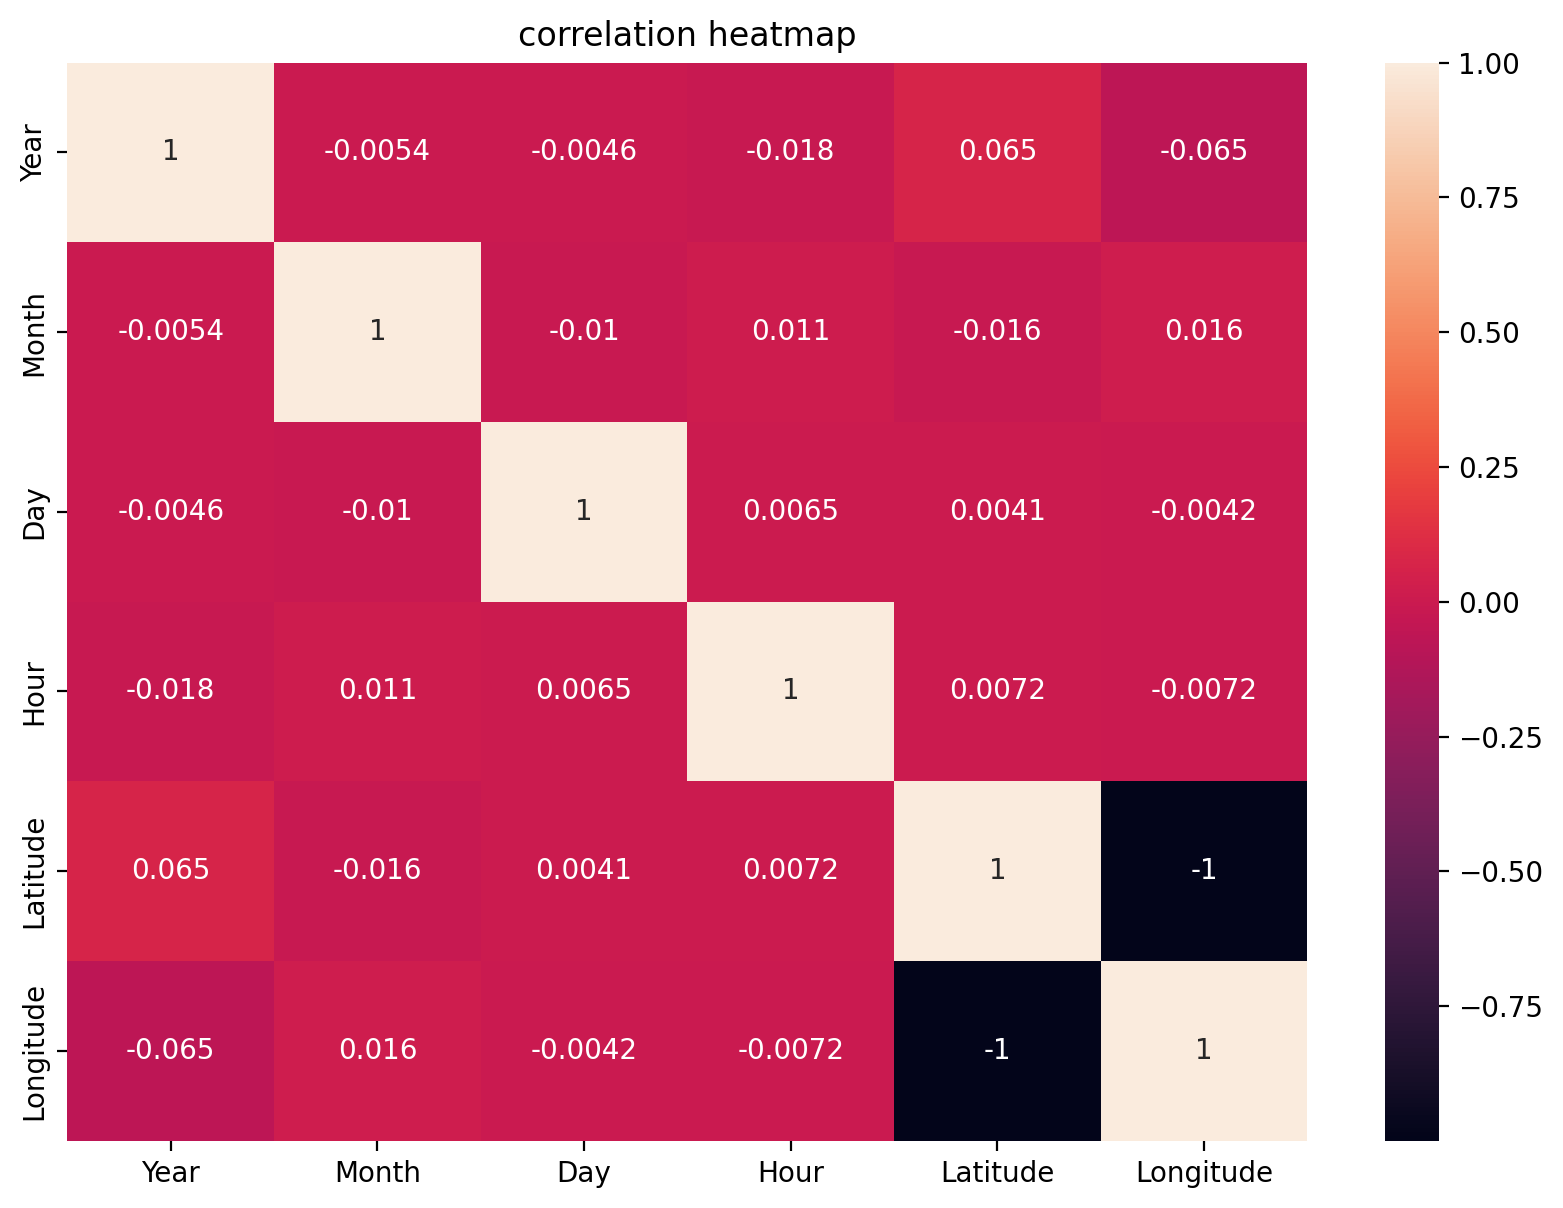

In [9]:
## Heatmap을 통한 변수들간 상관성 파악 >> 변수들 간 상관성은 전혀 안보임
plt.figure(figsize = (10,7))
sns.heatmap(data[['Year','Month', 'Day', 'Hour', 'Latitude', 'Longitude']].corr(),annot=True)
plt.title('correlation heatmap')

# Year, Hour
### 년도별 사고 분석 (2003 ~ 2015)
### 특정 시간대에 사고가 더 많이 발생하는지 확인 (0시~ 24시)
- 14~17시 사이 가장 많은 사고 발생

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003]


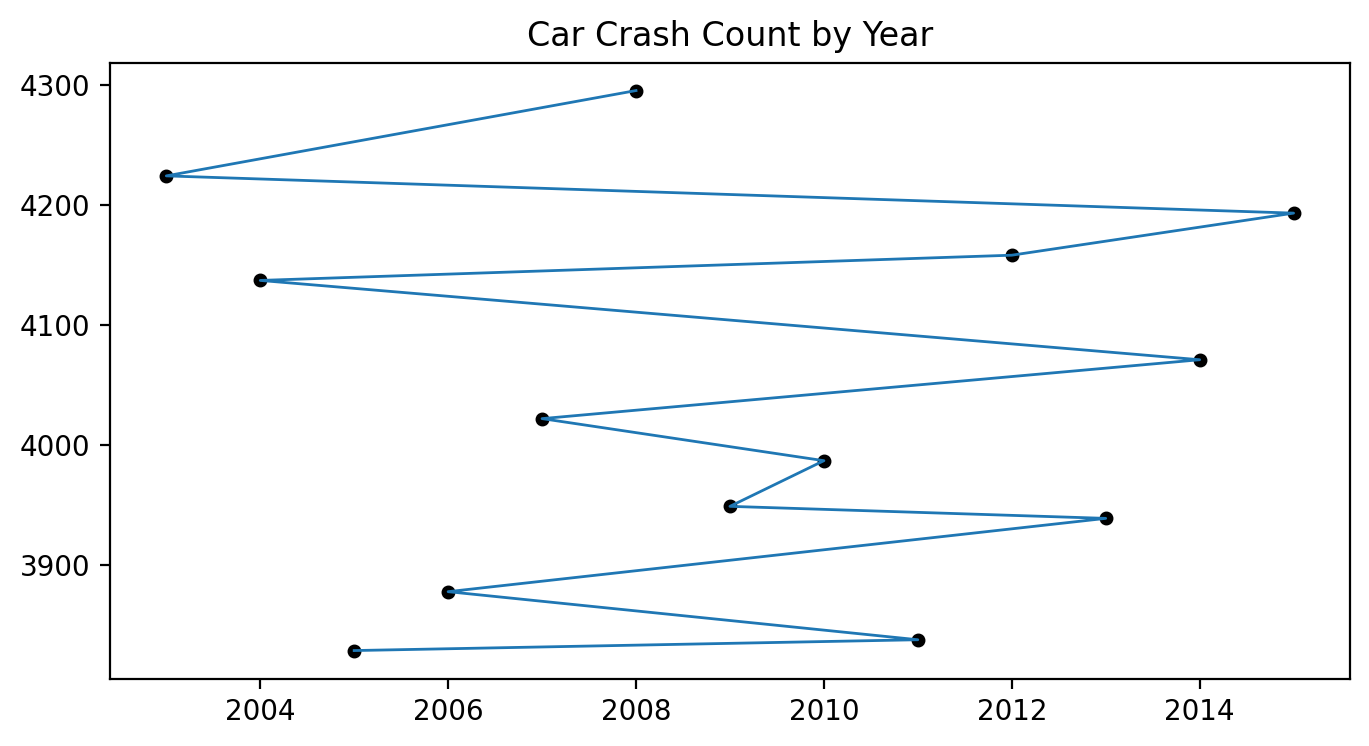

In [10]:
## year
print(data.Year.unique())
carcrash_year = data['Year'].value_counts()
plt.subplots(figsize=(8, 4))
plt.plot(carcrash_year.index, carcrash_year.values, 'o', color='black', markersize=4)
plt.plot(carcrash_year.index, carcrash_year.values,linewidth=1, markersize=6) ## 선이 가로형태로 나타나는 것을 세로형태로 바꿔야 함
plt.title('Car Crash Count by Year')
plt.show()

Hour
0.0       1052
100.0      765
200.0      697
300.0      696
400.0      453
500.0      500
600.0      788
700.0     1998
800.0     2199
900.0     2271
1000.0    2311
1100.0    2989
1200.0    3730
1300.0    3464
1400.0    3676
1500.0    4205
1600.0    4405
1700.0    4554
1800.0    3149
1900.0    2392
2000.0    1853
2100.0    1747
2200.0    1460
2300.0    1166
Name: Collision Type, dtype: int64


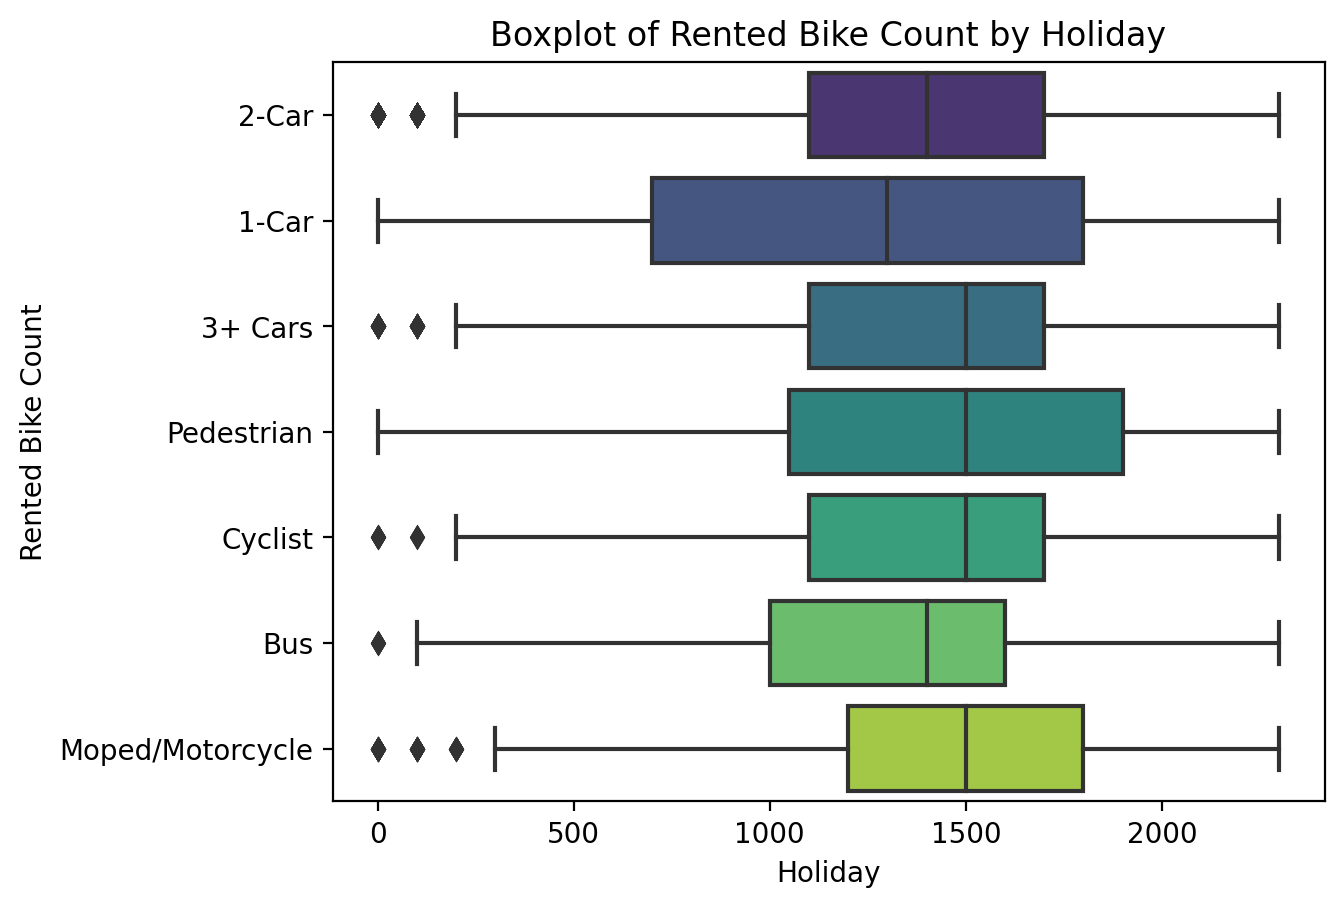

In [11]:
print(data.groupby('Hour')['Collision Type'].count())
## boxplot
sns.boxplot(x = 'Hour', y = 'Collision Type', data=data, palette='viridis') ## 14~17시에 가장 많은 사고 발생
plt.title('Boxplot of Rented Bike Count by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()

# Collision Type
- 2중 추돌이 가장 많음

Text(0.5, 1.0, 'Frequency of type of Accidents')

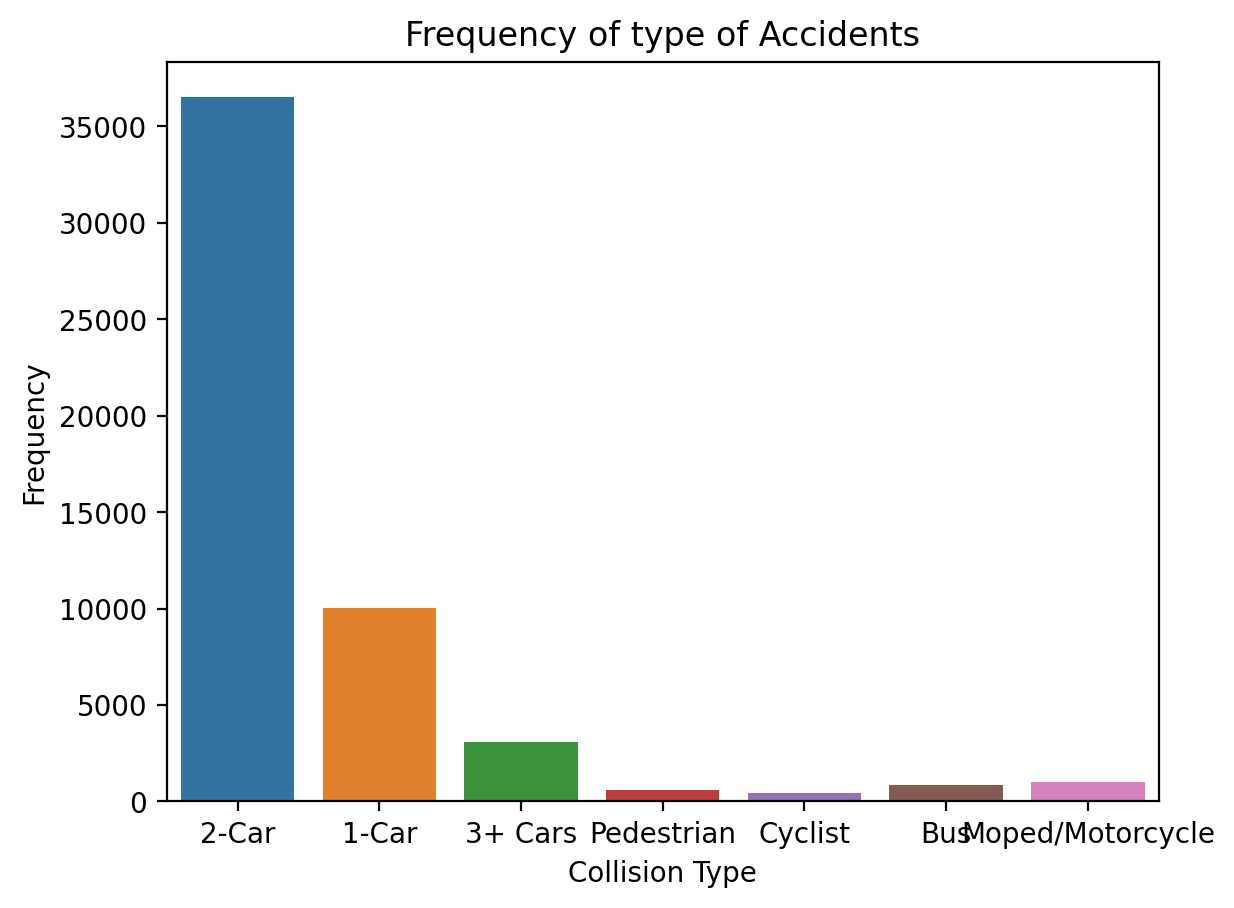

In [12]:
sns.countplot(x=data['Collision Type'])
plt.ylabel('Frequency')
plt.title('Frequency of type of Accidents')

## 사고 원인

In [13]:
data['Primary Factor'].nunique()
data['Primary Factor'].value_counts()

Primary Factor
FAILURE TO YIELD RIGHT OF WAY               11168
FOLLOWING TOO CLOSELY                        7336
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6064
UNSAFE BACKING                               5161
RAN OFF ROAD RIGHT                           2916
DISREGARD SIGNAL/REG SIGN                    2201
SPEED TOO FAST FOR WEATHER CONDITIONS        1907
IMPROPER TURNING                             1836
ANIMAL/OBJECT IN ROADWAY                     1682
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1652
UNSAFE SPEED                                 1491
ROADWAY SURFACE CONDITION                    1250
LEFT OF CENTER                               1070
IMPROPER LANE USAGE                           978
ALCOHOLIC BEVERAGES                           797
UNSAFE LANE MOVEMENT                          753
OVERCORRECTING/OVERSTEERING                   596
IMPROPER PASSING                              492
OTHER (VEHICLE) - EXPLAIN IN NARRATIVE        469
OTHER (ENVIRONMENTAL) - EXPLAIN IN 

In [14]:
data['Reported_Location'].value_counts()

Reported_Location
E 3RD ST                      351
W 3RD ST                      210
SR37N & VERNAL                196
3RD ST                        183
S WALNUT ST                   168
                             ... 
BUICK CADILAC DR & CLARIZZ      1
S COLLEGE & W 1RST ST           1
CURRY PIKE & STATE ROAD 48      1
EAST 1ST & FESS AVE             1
MONROW & THIRD ST               1
Name: count, Length: 19013, dtype: int64

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Reported_Location', hue='Primary Factor', data=data)
plt.xlabel('장소')
plt.ylabel('사고 발생량')
plt.title('장소와 사고 원인의 관계')

In [ ]:
correlation_matrix = data[['Latitude', 'Longitude']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('장소 좌표 상관 관계')
